In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/content/heart_disease.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.268478,199.640870,0.176304,0.604348,136.889565,0.394783,0.910478,1.757609,0.778913,5.371522,0.553261
std,9.424685,0.408148,0.930969,18.569153,109.240114,0.357484,0.804978,25.438033,0.477178,1.039830,0.539280,0.667765,1.508660,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.200000,0.200000,3.800000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.800000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.200000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [5]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


In [25]:
tar=data['target'].value_counts()

In [9]:
import matplotlib.pyplot as plt

In [ ]:
r

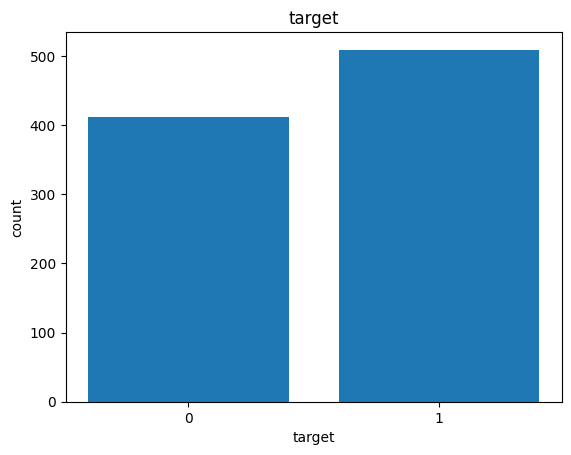

In [35]:

plt.bar(tar.index,tar.values)
plt.title('target')
plt.xlabel('target')
plt.ylabel('count')
plt.xticks(tar.index)
plt.show()

In [38]:
y=data['target']

In [37]:
x=data.drop(columns=['target','source'])

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
from sklearn.model_selection import train_test_split as t

In [41]:
x_train,x_test,y_train,y_test=t(x,y,test_size=0.2,random_state=45)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(736, 13)
(184, 13)
(736,)
(184,)


In [43]:
model=Sequential([
    Dense(13,activation='relu'),
    Dense(20,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')

])

In [44]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [50]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.33,batch_size=32)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8033 - loss: 0.4262 - val_accuracy: 0.7984 - val_loss: 0.5350
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7943 - loss: 0.4370 - val_accuracy: 0.7695 - val_loss: 0.5584
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8099 - loss: 0.4538 - val_accuracy: 0.7942 - val_loss: 0.5299
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8092 - loss: 0.4204 - val_accuracy: 0.7984 - val_loss: 0.5232
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8009 - loss: 0.4241 - val_accuracy: 0.7942 - val_loss: 0.5367
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8165 - loss: 0.4330 - val_accuracy: 0.7449 - val_loss: 0.6038
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7915 - loss: 0.4348 - val_accuracy: 0.7737 - val_loss: 0.5453
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7733 - loss: 0.4753 - val_accuracy: 0.7613 - val_loss:

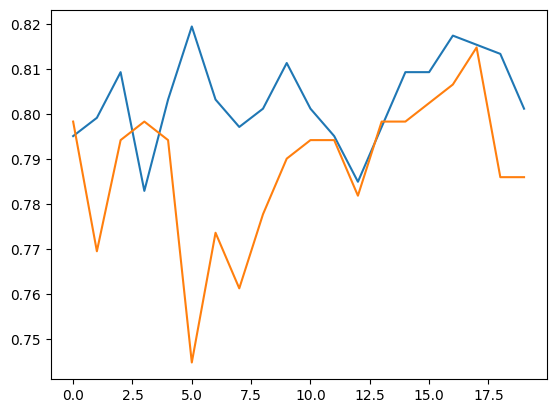

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [52]:
y_pred=model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [56]:
y_pred=(y_pred>=0.5)

In [57]:
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
sc=classification_report(y_test,y_pred)
print(sc)

              precision    recall  f1-score   support

           0       0.66      0.85      0.74        72
           1       0.88      0.71      0.79       112

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.76       184
weighted avg       0.79      0.77      0.77       184



In [72]:
import numpy as np
input=np.array([[60, 1, 3, 140, 289, 0, 1, 150, 0, 2.3, 2, 0, 3]])
input.reshape(-1,)
print(input.shape)

(1, 13)


In [74]:
m=model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [80]:
classs=int((m>=0.5))

<ipython-input-80-ba352bf2bef8>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classs=int((m>=0.5))


In [82]:
classs

0